# Unit 02 Project: Projectile Trajectory with Air Resistance

### Purpose

For my third physics project this semester, I decided to model a projectile trajectory with air resistance in the form of a playable tank game. I will use realistic physics models such as an RK4 ODE solver to determine the trajectory of the tank's bullet in each time step. The player of the game will have to adjust the speed and angle of the bullet, taking into account the air resistance, in order to hit the other cannon.

### Theoretical Model

The theoretical model I am using is RK4. <br>
RK4 is an iterative method including the Euler Method routine. <br>
We learned about the Euler Method in class, and also Rk4 which is essentially a more accurate version. <br> 
The RK4 iterative method follows this formula... <br>
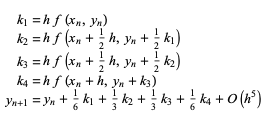 <br>
The formula is pretty complex, so to fully understand it if you have never heard of it, and are interested, I recommend reading about it here: https://lpsa.swarthmore.edu/NumInt/NumIntFourth.html <br>
Some assumptions I made were, that this model was taking place on Earth with a natural gravity of 9.8m/s. <br>
The bullet is actually a round cylinder. <br>
Air resistance doesn't affect in a model in the Z-direction. <br>
Collision causes the ball to lose all momentum, i.e no bouncing physics. <br>

### The Code

In [ ]:
from vpython import *
import ode
import numpy as np
from random import uniform

In [ ]:
#NOTE: All units are using the metric systems, primarily m/s

# Converts an ang in degrees radians        
def rad(degrees):
    radians=degrees*np.pi/180
    return radians

# Function for any 'keydown' event.
# Used to update power and angle, also to fire a shot.
def KD(event):
    global theta, mspeed, projectials, ang
    # Angle up
    if event.key=='w':
        theta=theta+dtheta
        if theta>rad(90):
            theta=rad(90)
            ang-=1
        turret1.axis=L*vector(cos(theta),sin(theta),0)
        adj_angle.axis=(5*theta)*vector(1,0,0)
        ang+=1
        label(pos=vec(-23,18.5,0), text=ang, box=False)
    # Power down
    if event.key=='a':
        mspeed=mspeed-dspeed
        if mspeed<1:
            mspeed=1
        adj_speed.axis=(mspeed/2+0.5)*vector(0.125,0,0)
        label(pos=vec(28,18.5,0), text=mspeed, box=False)
    # Power up
    if event.key=='d':
        mspeed=mspeed+dspeed
        if mspeed>160:
            mspeed=160
        adj_speed.axis=(mspeed/2+0.5)*vector(0.125,0,0)
        label(pos=vec(28,18.5,0), text=mspeed, box=False)
    # Angle down
    if event.key=='s':
        theta=theta-dtheta
        if theta<0:
            theta=0
            ang+=1
        turret1.axis=L*vector(cos(theta),sin(theta),0)
        adj_angle.axis=(5*theta)*vector(1,0,0)
        ang-=1
        label(pos=vec(-23,18.5,0), text=ang, box=False)
    # Fire tank
    if event.key=='f':
        bullet=sphere(pos=turret1.pos+turret1.axis, radius=0.5, color=color.white, make_trail=True)
        bullet.v=mspeed*vector(cos(theta),sin(theta),0)
        bullets.append(bullet)

# Function to check if the bullet made a collision
def collision(sphere, box):
    if((sphere.pos.x-sphere.radius<box.pos.x+box.length/2 and sphere.pos.x+sphere.radius>box.pos.x-box.length/2) and (sphere.pos.y-sphere.radius<box.pos.y+box.height/2 and sphere.pos.y+sphere.radius>box.pos.y-box.height/2)):
        result=True
    else:
        result=False
    return result

# Function to store the position and velocity of the bullet
def differential(d, tn):
    global Fnet, air_resistance
    speed = mag(vec(d[3], d[4], d[5]))
    rates=np.zeros(6)
    rates[0] = d[3]
    rates[1] = d[4]
    rates[2] = d[5]
    rates[3] = (Fnet.x-air_resistance*speed*d[3])/m
    rates[4] = (Fnet.y-air_resistance*speed*d[4])/m
    rates[5] = (Fnet.z-air_resistance*speed*d[5])/m
    return rates

         
# Setup scene
scene=canvas(title="<h1>Tank Wars</h1>")
scene.range=20
scene.width=600
scene.height=400
scene.bind('keydown', KD)
scene.userzoom=False
scene.append_to_title("<h2>Instructions</h2>")
scene.append_to_title("<p>1. Use the 'w' key arrow to increase or the 's' key to decrease the angle of the tank.</p>")
scene.append_to_title("<p>2. Use the 'a' key arrow to increase or the 'd' key to decrease the power of the tank.</p>")
scene.append_to_title("<p>3. Use the 'f' key to fire the tank.</p>")
scene.append_to_title("<p>4. Try to hit the other tank, but watch out for the wall and air resistance!</p>")


# Create enviroment
ground = box(pos=vector(0,-15,0), size=vector(60,2,2), color=color.green)
wall = box(pos=vector(0,-9,0), size=vector(2, 10, 2), color=color.red)
tank1 = box(pos=vector(-20,-13,0), size=vector(2,2,2), color=color.cyan)
tank2 = box(pos=vector(20,-13,0), size=vector(2,2,2), color=color.purple)
turret1 = cylinder(pos=tank1.pos, axis=vector(2,2,0), radius=0.5, color=tank1.color)
turret1.pos.y=turret1.pos.y+tank1.height/2
turret2 = cylinder(pos=tank2.pos, axis=vector(-2,2,0), radius=0.5, color=tank2.color)
turret2.pos.y=turret2.pos.y+tank2.height/2
adj_angle = cylinder(pos=vector(-18,-19,0), axis=vector(1,0,0), radius=1, color=color.magenta)
adj_speed = cylinder(pos=vector(5,-19,0), axis=vector(1,0,0), radius=1, color=color.cyan)

# Default Variables w/ Motion
theta=rad(45)
dtheta=rad(1)
L=3
m=1
mspeed=80
dspeed=1
ang = 46
score = 0
air_resistance = uniform(0,.07)
g=vector(0,-9.8,0)
turret1.axis=L*vector(cos(theta),sin(theta),0)
Fnet=vector(0,0,0)

# Time
dt = 0.01
t = 0

# Create bullet list
bullets=[]

# Update bar axis
adj_angle.axis=(5*theta)*vector(1,0,0)
adj_speed.axis=(mspeed/2+0.5)*vector(0.125,0,0)

# Labels
label(pos=vec(-27,18.5,0), text="Angle:", box=False)
label(pos=vec(-23,18.5,0), text=ang, box=False)
label(pos=vec(-1.25,18.5,0), text="Score:", box=False)
label(pos=vec(1.75,18.5,0), text=score, box=False)
label(pos=vec(24,18.5,0), text="Power:", box=False)
label(pos=vec(28,18.5,0), text=mspeed, box=False)
label(pos=vec(21.5,16,0), text="Resistance:", box=False)
label(pos=vec(27.5,16,0), text="%.02f" % (air_resistance), box=False)

# Game loop
while True:
    rate(100)
    for b in bullets:
        # Store pos and vel of bullet
        data=np.array([b.pos.x, b.pos.y, b.pos.z, b.v.x, b.v.y, b.v.z])
        # Bullet hit ground
        if(b.pos.y<ground.pos.y+ground.height/2):
            Fnet=vector(0,0,0)
            b.v=vector(0,0,0)
            b.make_trail=False
            b.clear_trail()
            b.visible = False
            bullets.pop(0)
        # Bullet hit wall
        elif collision(b,wall):
            Fnet=vector(0,0,0)
            b.v=g
            b.make_trail=False
            b.clear_trail()
            b.visible = False
            bullets.pop(0)
        # Bullet hit tank/target
        elif collision(b,tank2):
            Fnet=vector(0,0,0)
            b.v=vector(0,0,0)
            score+=1
            label(pos=vec(1.75,18.5,0), text=score, box=False)
            b.visible = False
            b.make_trail=False
            b.clear_trail()
            bullets.pop(0)
        # Bullet still in the air
        else:
            Fnet=m*g

        # Update pos and vel of the bullet using the RK4 and differential functions.
        data = ode.RK4(differential, data, t, dt)
        b.pos = vec(data[0], data[1], data[2])
        b.v = vec(data[3], data[4], data[5])

        # Update time
        t=t+dt

### Validation

In order to validate the program, I tested many scenarios where I could confirm the results.<br>
Examples:<br> 
Shooting with the same angle and power with different air resistances.<br>
Shooting the cannon straight up with and w/o air resistance.<br>
Modeling my RK4 function extensively in different cases in class.<br>
Giving small increments to power angle and air resistance to confirm slightly different results.<br>
Shooting the cannon with maximum and minimum power.<br>
Etc.

### Results/Conclusion

I have successfully modeled projectile motion w/ air resistance in a fairly realistic manner. <br>
I believe, the only non-realistic aspect is the physics with the bullet and the wall.<br>
Theoretically, the bullet would bounce off the wall or even go through (it was going fast enough), but clearly, that is not modeled here.


### References

I used my professor’s version of a tank game as a starting place for mine.
Listed here: https://www.glowscript.org/#/user/Aaron_Titus/folder/physics-for-video-games/program/GAME-Tank/edit
I contributed by adding the RK4 model with air resistance, as well as turning it more into a playable game.